#### 1. Acitivity of Zebra Fish and Melatonin
In this study, the researchers in Prof. Prober's lab studied the activity of zebrafish larvae. Each fish was put in its own little well and recorded with a camera. Whenever a fish moves, the system detects and records the movement, indicated here by the red flashes in the video. The more movement, the more wakeful the fish. These fish are interesting because some of them have a mutation in a gene involved in producing melatonin, an important hormone for sleep regulation. Fish that have the mutation are called mutants, and those that do not are called wild type. If we look at the mean activity of the fish over time, we see that compared to wild type the mutant fish are more active at night, which is indicated by the gray regions on the plot. Our goal with this warm-up analysis is to quantify the effect of this mutation on wakefulness. We will use nighttime active bouts as a metric for wakefulness of the fish. An active bout is a period of time where a fish is consistently active. The *length* of an active bout is the number of consecutive minutes that a fish is active. 
Generically speaking, a probability distribution is a mathematical description of outcomes. But they are easier to think about as stories. Here, I will review the Exponential distribution. Its story has to do with Poisson processes. For a Poisson process, the timing of an event, called an "arrival," is completely independent of when the previous event arrived. The waiting time between arrivals is Exponentially distributed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst # module containing all functions we used in 1_statistical_thinking and 2_statistical thinking

#### EDA: Plot ECDFs of active bout length
An active bout is a stretch of time where a fish is constantly moving. Plot an ECDF of active bout length for the mutant and wild type fish for the seventh night of their lives. The data sets are in the numpy arrays bout_lengths_wt and bout_lengths_mut. The bout lengths are in units of minutes.

In [2]:
df = pd.read_csv('gandhi_et_al_bouts.csv')

In [3]:
df.head()

,genotype,bout_length,fish
0,het,12.00,1
1,het,33.00,1
2,het,0.96,1
3,het,4.98,1
4,het,1.98,1


In [4]:
## Selecting the columns from the dataframe that will be used to plot the ecdf
bout_lengths_wt = df[df['genotype'] == 'wt']['bout_length'].to_numpy()
bout_lengths_mut = df[df['genotype'] == 'mut']['bout_length'].to_numpy()

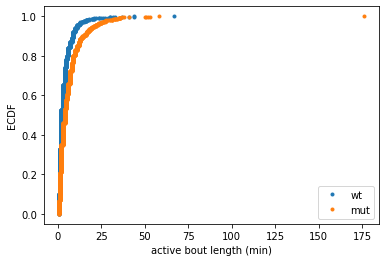

In [5]:
# Import the dc_stat_think module as dcst
import dc_stat_think as dcst

# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(bout_lengths_wt)
x_mut, y_mut = dcst.ecdf(bout_lengths_mut)

# Plot the ECDFs
_ = plt.plot(x_wt, y_wt, marker = '.', linestyle = 'none')
_ = plt.plot(x_mut, y_mut, marker = '.', linestyle = 'none')

# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')
plt.show()

Great work! There is an outlier of one active bout for a mutant fish, and the ECDF exposes this clearly. It is important to know about, but we will not focus on it going forward, though.

#### Interpreting ECDFs and the story
While a more detailed analysis of distributions is often warranted for careful analyses, you can already get a feel for the distributions and the story behind the data by eyeballing the ECDFs. 

The bout lengths appear Exponentially distributed, which implies that exiting an active bout to rest is a Poisson process; the fish have no apparent memory about when they became active.

While not exactly Exponentially distributed, the ECDF has no left tail, and no discernible inflection point, which is very much like the Exponential CDF.

#### Parameter estimation: active bout length
Compute the mean active bout length for wild type and mutant, with 95% bootstrap confidence interval. The data sets are again available in the numpy arrays bout_lengths_wt and bout_lengths_mut. The dc_stat_think module has been imported as dcst.

In [6]:
# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size = 10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size = 10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



The confidence intervals are quite separated. Nonetheless, we will proceed to perform hypothesis tests.

#### Permutation and Bootstrap Hypothesis Tests
You just found that the mean active bout length for mutant fish that have inhibited melatonin production is much longer than for wild type fish that have normal melatonin production.
This is especially clear if we look at the confidence intervals graphically. Obviously, there is an effect on activity due to mutation of this gene. In addition to mutant fish, Prof. Prober's lab also studied heterozygotic fish. These are fish that have one mutated copy of the gene and one functional copy, unlike the mutant, which has two mutated copies, or wild type, which has two functional copies. When we do the same analysis of the heterozygote, we see that the effect is much smaller. Indeed, if we look at the ECDFs of active bout length, here with the x-axis range adjusted for ease of comparison, we see only a slight difference between the wild type and heterozygotic fish. We have quantified the differences, and we can see them graphically, but now is a good time to test the hypothesis that there is no difference between the heterozygotic and wild type fish. 
A hypothesis test is an assessment of how reasonable the observed data are assuming a hypothesis, called the null hypothesis, is true. The result of a hypothesis test is a p-value, defined as the probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true. As a reminder, a test statistic is a single number that can be computed from observed data and from data you simulate under the null hypothesis to serve as a basis of comparison.
The p-value only makes sense if the null hypothesis, test statistic, and the meaning of "at least as extreme as" are clearly defined. So, the pipeline for doing a hypothesis test is to clearly state the null hypothesis and the test statistic. Then you *simulate* production of the data as if the null hypothesis were true. For each of these simulated data sets, compute the test statistic. The p-value is then the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data. Let's consider now the hypothesis that the active bout lengths of wild type and heterozygotic fish are identically distributed. We will use the difference in means of the active bout lengths as a test statistic, and consider test statistics greater than or equal to what was observed to be "at least as extreme as." 
The hypothesis says that wild type and heterozygotic fish are completely indistinguishable with respect to their active bout lengths. To simulate this, you can scramble which bout lengths are labeled "wild type" and which are labeled "heterozygote" and compute the test statistic. You do this over and over again to get many permutation replicates. This is called a *permutation test*. You implemented this in the `draw_perm_reps()` function of the `dc_stat_think` module. The first two arguments are the two data sets you are comparing in the hypothesis test. The third argument is a function used to compute the test statistic. You already wrote one to do difference of means, and it is also included in the `dc_stat_think` module. The last argument says how many replicates to generate. Finally, the p-value is computed as the fraction of replicates at least as extreme as what was observed.

#### Permutation test: wild type versus heterozygote
Test the hypothesis that the heterozygote and wild type bout lengths are identically distributed using a permutation test.

In [7]:
#Extracing the bout length for the heterozygote fish
bout_lengths_het = df[df['genotype'] == 'het']['bout_length']

In [8]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, 
                               dcst.diff_of_means, size = 10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.0008


A p-value of 0.001 suggests that the observed difference in means is unlikely to occur if heterozygotic and wild type fish have active bout lengths that are identically distributed.

#### Bootstrap hypothesis test
The permutation test has a pretty restrictive hypothesis, that the heterozygotic and wild type bout lengths are identically distributed. Now, use a bootstrap hypothesis test to test the hypothesis that the means are equal, making no assumptions about the distributions.

In [9]:
# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted, np.mean, size = 10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted, np.mean, size = 10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

p-value = 0.0006


We get a result of similar magnitude as the permutation test, though slightly smaller, probably because the heterozygote bout length distribution has a heavier tail to the right.

#### Linear Regressions and Pairs Bootstrap
Sometimes variables are related to each other and a linear relationship is appropriate for the data. In these cases, a linear regression is useful to quantify the relationship between two related variables. To practice performing linear regressions, we will consider another data set from the biological sciences at Caltech, this time from the lab of Michael Elowitz. Here is a movie of two bacteria of the species *Bacillus subtilis* growing and dividing into a small colony. These bacteria were engineered to have fluorescent proteins in them, which is why they glow, enabling us to see them clearly. If I plot the total area of bacteria in the image over time, we see this beautiful growth curve. This is clearly not a linear curve, though. However, if I instead plot the logarithm of the bacterial area versus time, the curve is linear. This is accomplished using the `plt.semilogy()` function, which works just like `plt.plot()`, but with the y-axis on a logarithmic scale. The slope of the growth curve on a semilog plot is the growth rate of the bacteria. In the second Statistical Thinking course, you learned how to perform a linear regression using `np.polyfit()`. The first two arguments are the respective x and y values you want to fit with a line. The last argument is always one for a linear regression because a line is a polynomial of degree one. The function returns the slope and intercept of the best fit line. You can then generate points to use to plot a theoretical line, and can finally put it all together on a plot. The problem is that we need to perform the regression using the *logarithm* of the bacterial area. We now use `np.log()` to pass the logarithm of the bacterial area into `np.polyfit()`. When computing the theoretical area, we exponentiate the theoretical curve using `np.exp()` to recover the area in square micrometers. Finally, we make our plots using `plt.semilogy()`. Now, you might already be thinking of the next question. If we did this experiment again, how might the growth rate we obtain change? Or more specifically, what is the 95% confidence interval of the growth rate? Pairs bootstrap is an approach to compute confidence intervals for regression parameters. Instead of resampling a single data set, as we did before, we resample *pairs* of data. In this case, we take a time point and its corresponding bacterial area, store it, and then select another time point-bacterial area pair, and so on with replacement. We then compute the slope and intercept from the resampled data to get a pairs bootstrap replicate. We do this over and over again and then compute the confidence interval from percentiles of the replicates.You wrote a function called `draw_bs_pairs_linreg()` to do this in Statistical Thinking Part II, and it is also implemented in the `dc_stat_think` module. Given x and y data, as well as the number of replicates you want via the `size` keyword argument, it returns pairs bootstrap replicates of the slope and intercept. You can then compute the confidence interval from the replicates using the `np.percentile()` function.


#### Assessing the growth rate
To compute the growth rate, you can do a linear regression of the logarithm of the total bacterial area versus time. Compute the growth rate and get a 95% confidence interval using pairs bootstrap. The time points, in units of hours, are stored in the numpy array `t` and the bacterial area, in units of square micrometers, is stored in `bac_area`.

In [10]:
### Getting the relevant columns from the dataset 
bacteria_growth = pd.read_csv('park_bacterial_growth.csv')


t = bacteria_growth['time (hr)'].to_numpy()
bac_area = bacteria_growth['bacterial area (sq. microns)'].to_numpy()

In [11]:
# Compute logarithm of the bacterial area: log_bac_area
log_bac_area = np.log(bac_area)

# Compute the slope and intercept: growth_rate, log_a0
growth_rate, log_a0 = np.polyfit(t, log_bac_area, 1)

# Draw 10,000 pairs bootstrap replicates: growth_rate_bs_reps, log_a0_bs_reps
growth_rate_bs_reps, log_a0_bs_reps = dcst.draw_bs_pairs_linreg(
    t, log_bac_area, size = 10000
)
    
# Compute confidence intervals: growth_rate_conf_int
growth_rate_conf_int = np.percentile(growth_rate_bs_reps, [2.5, 97.5])

# Print the result to the screen
print("""
Growth rate: {0:.4f} 1/hour
95% conf int: [{1:.4f}, {2:.4f}] 1/hour
""".format(growth_rate, *growth_rate_conf_int))


Growth rate: 0.2301 1/hour
95% conf int: [0.2266, 0.2336] 1/hour



Under these conditions, the bacterial mass doubles about every three hours. The error bar is very tight, which we will see graphically in the next cell.

#### Plotting the growth curve
The confidence interval on the growth curve is very tight. You will explore this graphically here by plotting several bootstrap lines along with the growth curve. You will use the plt.semilogy() function to make the plot with the y-axis on a log scale. This means that you will need to transform your theoretical linear regression curve for plotting by exponentiating it.

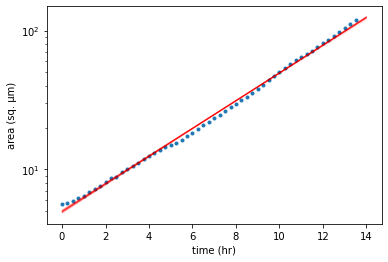

In [12]:
# Plot data points in a semilog-y plot with axis labeles
_ = plt.semilogy(t, bac_area, marker='.', linestyle='none')

# Generate x-values for the bootstrap lines: t_bs
t_bs = np.array([0, 14])

# Plot the first 100 bootstrap lines
for i in range(100):
    y = np.exp(growth_rate_bs_reps[i] * t_bs + log_a0_bs_reps[i])
    _ = plt.semilogy(t_bs, y, linewidth=0.5, alpha=0.05, color='red')
    
# Label axes and show plot
_ = plt.xlabel('time (hr)')
_ = plt.ylabel('area (sq. µm)')
plt.show()

You can see that the bootstrap replicates do not stray much. This is due to the exquisitly exponential nature of the bacterial growth under these experimental conditions.